In [78]:
from ray.tune import Analysis
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib

matplotlib.rcParams.update({'font.size': 22})

In [79]:
def extract_df(analysis, key): 
    import numpy as np
    lossG = [df[key].tolist() for df in list(analysis.trial_dataframes.values())]
    iters = []
    val = []
    for g in lossG: 
        iters.extend(np.arange(len(g)))
        val.extend(g)

    res = pd.DataFrame({'iters':iters, 'value':val})
    return res

def filter_dfs(res): 
    dfs = []
    for iters in range(59):
        cols = res.loc[res['iters']==iters]
        cols = cols.sort_values(by='value', ascending=False)
        dfs.append(cols.iloc[:-8])

    res_final = pd.concat(dfs, axis=0)
    return res_final

In [83]:
def prod_plots(name1, key='eval_rew_mean', 
               baseline='uniform_prob_benchmark_original_alpha_max_0.000_perturb_59',
              title="graph"):

    from ray.tune import Analysis
    analysis = Analysis('/home/smetzger/ray_results/' + name1)#pbt_alphavar_2_random_alpha_max_0.100)
    import matplotlib.pyplot as plt

    res = extract_df(analysis, key)
    res_final = filter_dfs(res)

    from ray.tune import Analysis
    # analysis = Analysis('/home/smetzger/ray_results/uniform_prob_original_alpha_max_0.020_perturb_2')
    analysis = Analysis('/home/smetzger/ray_results/' + baseline)#pbt_alphavar_2_random_alpha_max_0.100)

    res2 = extract_df(analysis, key)
    res2_final = filter_dfs(res2)
    sns.lineplot(x='iters', y='value', data=res_final, label='assist')
    sns.lineplot(x = 'iters', y='value', data=res2_final, label='No assist')
    plt.ylabel('reward')
    plt.title(title)
    plt.show()

In [84]:
import os
runs = os.listdir('/home/smetzger/ray_results')
r = [r for r in runs if 'uniform' in r]
r = [r for r in runs if 'loguni' in r]
# r = [r for r in runs if 'ddpg' in r]
r = [r for r in runs if 'pg_alpha' in r]
r = [r for r in runs if 'ddpg' in r]
r = [r for r in runs if 'reacher' in r]
print(r)

['PG_pg_reacher_alpha_original_alpha_max_0.000_perturb_1_FetchReach-v1', 'reacher_original_alpha_max_100.000_perturb_1', 'reacher_original_alpha_max_0.100_perturb_1', 'PG_pg_reacher_alpha_original_alpha_max_10.000_perturb_1_FetchReach-v1', 'reacher_original_alpha_max_10.000_perturb_1', 'reacher_baseline_original_alpha_max_0.000_perturb_1', 'DDPG_ddpg_reacher_baseline_original_alpha_max_0.000_perturb_1_FetchReach-v1', 'reacher3_original_alpha_max_10.000_perturb_3', 'reacher_original_alpha_max_1.000_perturb_1']


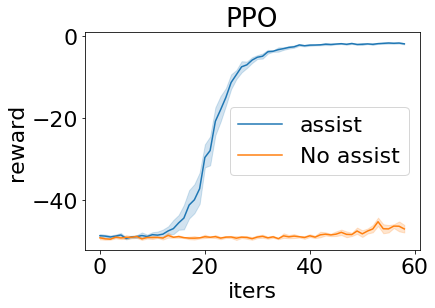

In [87]:
# REACHER WITH PPO
r = ['reacher_original_alpha_max_10.000_perturb_1']
for rr in r: 
    prod_plots(rr, key='eval_rew_mean', baseline='reacher_baseline_original_alpha_max_0.000_perturb_1',
              title="PPO")

['DDPG_ddpg_reacher_baseline_original_alpha_max_0.000_perturb_1_FetchReach-v1']


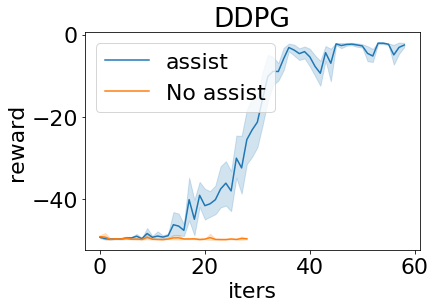

In [97]:
r = [r for r in runs if 'ddpg_reacher_baseline' in r] # THIS USES DDPG
print(r)
r= ['ddpg_original_alpha_max_10.000_perturb_1']
for rr in r: 
    prod_plots(rr, key='eval_rew_mean',
               baseline='DDPG_ddpg_reacher_baseline_original_alpha_max_0.000_perturb_1_FetchReach-v1',
              title='DDPG')

['PG_pg_reacher_alpha_original_alpha_max_0.000_perturb_1_FetchReach-v1', 'PG_pg_reacher_alpha_original_alpha_max_10.000_perturb_1_FetchReach-v1']


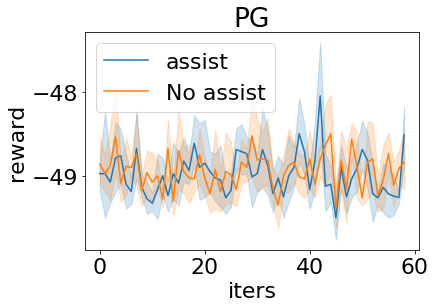

In [98]:
r = [r for r in runs if 'pg_reacher_alpha' in r] # THIS USES DDPG
print(r)
r= ['PG_pg_reacher_alpha_original_alpha_max_10.000_perturb_1_FetchReach-v1']
for rr in r: 
    prod_plots(rr, key='eval_rew_mean',
               baseline='PG_pg_reacher_alpha_original_alpha_max_0.000_perturb_1_FetchReach-v1',
              title='PG')

In [72]:
def prod_plots(name1, key='eval_rew_mean'):
    from ray.tune import Analysis
    import pandas as pd
    import seaborn as sns
    import numpy as np
    analysis = Analysis('/home/smetzger/ray_results/' + name1)#pbt_alphavar_2_random_alpha_max_0.100)
    df = analysis.dataframe()
    import matplotlib.pyplot as plt
    lossG = [df[key].tolist() for df in list(analysis.trial_dataframes.values())]
    alphaG = [df['cur_alpha'].tolist() for df in list(analysis.trial_dataframes.values())]


    iters = []
    val = []
    for g in lossG: 
        iters.extend(np.arange(len(g)))
        val.extend(g)

    res = pd.DataFrame({'iters':iters, 'value':val})

    dfs = []
    for iters in range(59):
        cols = res.loc[res['iters']==iters]
        cols = cols.sort_values(by='value', ascending=False)
        dfs.append(cols.iloc[:-8])

    res_final = pd.concat(dfs, axis=0)
    res_final

    from ray.tune import Analysis
    # analysis = Analysis('/home/smetzger/ray_results/uniform_prob_original_alpha_max_0.020_perturb_2')
    analysis = Analysis('/home/smetzger/ray_results/uniform_prob_benchmark_original_alpha_max_0.000_perturb_59')#pbt_alphavar_2_random_alpha_max_0.100)

    df = analysis.dataframe()

    df
    import numpy as np
    lossG = [df[key].tolist() for df in list(analysis.trial_dataframes.values())]
    # plt.figure(figsize=(10,5))
    plt.title("Inception Score During Training")

    iters = []
    val = []
    for g in lossG: 
        iters.extend(np.arange(len(g)))
        val.extend(g)

    res2 = pd.DataFrame({'iters':iters, 'value':val})

    dfs = []
    for iters in range(59):
        cols = res2.loc[res2['iters']==iters]
        cols = cols.sort_values(by='value', ascending=False)
        dfs.append(cols.iloc[:-8])

    res2_final = pd.concat(dfs, axis=0)
    sns.lineplot(x='iters', y='value', data=res_final, label='assist')
    sns.lineplot(x = 'iters', y='value', data=res2_final, label='No assist')
    plt.title(name1)
    plt.show()